# DIYANG RADITYA ANWAR

# SKRIPSI : Identifikasi Peluang Optimasi Biaya Layanan Cloud AWS PT Jalin Mayantara Menggunakan Random Forest dan LLM

# 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error, r2_score

# 2. Data Loading & Understanding

In [2]:
data = pd.read_csv("../Datasets/original-copy.csv")
data.head(10)

C:\Users\diyan\AppData\Local\Temp\ipykernel_31412\2723259410.py:1: DtypeWarning: Columns (27,31,34,38,39,48,54,57,62,65,75,89,90,91,93,100,102,110,114,115,121,123,171,174,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Datasets/original-copy.csv")


,identity_line_item_id,identity_time_interval,bill_invoice_id,bill_invoicing_entity,bill_billing_entity,bill_bill_type,bill_payer_account_id,bill_billing_period_start_date,bill_billing_period_end_date,line_item_usage_account_id,...,resource_tags_user_s_t_a_g_e,resource_tags_user_service,resource_tags_user_tahun,resource_tags_user_tech_owner,resource_tags_user_devops_guru_default,resource_tags_user_dlm_managed,resource_tags_user_sagemaker_domain_arn,resource_tags_user_sagemaker_user_profile_arn,year,month
0,742hebaao4o3fkrg7usu6feyubf2oja7exkcgs4ypt67g3...,2025-02-13T08:00:00Z/2025-02-13T09:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
1,gfusojkmeaf5gwgknv3bco53rdenktdzpnh7td3wqnl2zl...,2025-02-01T12:00:00Z/2025-02-01T13:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,VPN,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
2,vcdwabklawby45kve5scfv7bkaprmxmgrdiu3eef53kjz2...,2025-02-05T10:00:00Z/2025-02-05T11:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
3,wge5bhzrtdbrebamtzpe3d5weql2afxuhzcpesat7lnbd2...,2025-02-15T08:00:00Z/2025-02-15T09:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
4,plyjnetvnsd5qq7rqf4aacod6ni2bceellrb6m3hd5am5q...,2025-02-01T15:00:00Z/2025-02-01T16:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
5,zdkbhkh72qwfl76ohn5vmodp4j7iwxfn7a7h763fs2krrj...,2025-02-13T20:00:00Z/2025-02-13T21:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
6,f6tobedhdb7oha6uyqaeobuq6saz6n24lecf47lh2rn4ra...,2025-02-08T18:00:00Z/2025-02-08T19:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
7,hn5xo547x2hrsuc4b2f4t4xcjaqviigig6xy3ypdaandga...,2025-02-05T23:00:00Z/2025-02-06T00:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,Monitoring,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
8,5skmtx6yc7rvmoir234obg6dncrzollth4xhpxcuwparnd...,2025-02-07T02:00:00Z/2025-02-07T03:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,Web,NaN,DIP,NaN,NaN,NaN,NaN,2025,2
9,y24nwbvsrwg63ltbp5dz6cocbet6zyc2h33w6taaoeu4bv...,2025-02-04T09:00:00Z/2025-02-04T10:00:00Z,NaN,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,...,NaN,VPN,2024.0,NaN,NaN,NaN,NaN,NaN,2025,2


In [3]:
print(f"Ukuran baris x kolom : {data.shape}")

Ukuran baris x kolom : (1343347, 188)


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343347 entries, 0 to 1343346
Data columns (total 188 columns):
 #    Column                                                        Dtype  
---   ------                                                        -----  
 0    identity_line_item_id                                         object 
 1    identity_time_interval                                        object 
 2    bill_invoice_id                                               float64
 3    bill_invoicing_entity                                         object 
 4    bill_billing_entity                                           object 
 5    bill_bill_type                                                object 
 6    bill_payer_account_id                                         int64  
 7    bill_billing_period_start_date                                object 
 8    bill_billing_period_end_date                                  object 
 9    line_item_usage_account_id                  

In [5]:
data.isna().sum()

identity_line_item_id                                  0
identity_time_interval                                 0
bill_invoice_id                                  1343347
bill_invoicing_entity                                  0
bill_billing_entity                                    0
                                                  ...   
resource_tags_user_dlm_managed                   1338789
resource_tags_user_sagemaker_domain_arn          1342972
resource_tags_user_sagemaker_user_profile_arn    1342972
year                                                   0
month                                                  0
Length: 188, dtype: int64

# 3. Data Cleaning
## Fase cleaning 1

Dataset log operasional server PT Jayantara pada bulan Februari 2025 ini memiliki 1343347 baris dan 188 kolom. Namun, masih banyak yang kotor datanya seperti data yang banyak null valuesnya, format yang belum sesuai, dll. Bisa kita drop terlebih dahulu fitur-fitur yang semuanya null. Fitur-fitur tersebut adalah :
- bill_invoice_id
- product_datatransferout
- product_pre_installed_sw
- reservation_end_time
- reservation_modification_status
- reservation_normalized_units_per_reservation
- reservation_number_of_reservations
- reservation_start_time
- reservation_total_reserved_normalized_units
- reservation_total_reserved_units
- reservation_units_per_reservation

In [6]:
data.drop(columns=["bill_invoice_id", "product_datatransferout", "product_pre_installed_sw", "reservation_end_time",
                    "reservation_modification_status", "reservation_normalized_units_per_reservation", "reservation_number_of_reservations", 
                    "reservation_start_time", "reservation_total_reserved_normalized_units", "reservation_total_reserved_units", 
                    "reservation_units_per_reservation"], axis=1, inplace=True)
data.head(10)

,identity_line_item_id,identity_time_interval,bill_invoicing_entity,bill_billing_entity,bill_bill_type,bill_payer_account_id,bill_billing_period_start_date,bill_billing_period_end_date,line_item_usage_account_id,line_item_line_item_type,...,resource_tags_user_s_t_a_g_e,resource_tags_user_service,resource_tags_user_tahun,resource_tags_user_tech_owner,resource_tags_user_devops_guru_default,resource_tags_user_dlm_managed,resource_tags_user_sagemaker_domain_arn,resource_tags_user_sagemaker_user_profile_arn,year,month
0,742hebaao4o3fkrg7usu6feyubf2oja7exkcgs4ypt67g3...,2025-02-13T08:00:00Z/2025-02-13T09:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
1,gfusojkmeaf5gwgknv3bco53rdenktdzpnh7td3wqnl2zl...,2025-02-01T12:00:00Z/2025-02-01T13:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,VPN,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
2,vcdwabklawby45kve5scfv7bkaprmxmgrdiu3eef53kjz2...,2025-02-05T10:00:00Z/2025-02-05T11:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
3,wge5bhzrtdbrebamtzpe3d5weql2afxuhzcpesat7lnbd2...,2025-02-15T08:00:00Z/2025-02-15T09:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
4,plyjnetvnsd5qq7rqf4aacod6ni2bceellrb6m3hd5am5q...,2025-02-01T15:00:00Z/2025-02-01T16:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
5,zdkbhkh72qwfl76ohn5vmodp4j7iwxfn7a7h763fs2krrj...,2025-02-13T20:00:00Z/2025-02-13T21:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,Storage,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
6,f6tobedhdb7oha6uyqaeobuq6saz6n24lecf47lh2rn4ra...,2025-02-08T18:00:00Z/2025-02-08T19:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025,2
7,hn5xo547x2hrsuc4b2f4t4xcjaqviigig6xy3ypdaandga...,2025-02-05T23:00:00Z/2025-02-06T00:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,Monitoring,NaN,INFRA,NaN,NaN,NaN,NaN,2025,2
8,5skmtx6yc7rvmoir234obg6dncrzollth4xhpxcuwparnd...,2025-02-07T02:00:00Z/2025-02-07T03:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,Web,NaN,DIP,NaN,NaN,NaN,NaN,2025,2
9,y24nwbvsrwg63ltbp5dz6cocbet6zyc2h33w6taaoeu4bv...,2025-02-04T09:00:00Z/2025-02-04T10:00:00Z,"Amazon Web Services, Inc.",AWS,Anniversary,171404033541,2025-02-01 00:00:00.000,2025-03-01 00:00:00.000,22159271696,Usage,...,NaN,VPN,2024.0,NaN,NaN,NaN,NaN,NaN,2025,2


In [7]:
data2 = data.copy()

In [9]:
data2["product_usagetype"].value_counts()

product_usagetype
APS1-DataTransfer-Regional-Bytes    149247
APS1-EBS:VolumeUsage                119630
APS1-DataTransfer-Out-Bytes         113117
APS1-EBS:VolumeIOUsage              110319
APS1-DataTransfer-In-Bytes          109254
                                     ...  
APS1-AKL1-AWS-Out-Bytes                  1
APS1-CHI1-AWS-Out-Bytes                  1
APS1-AKL1-AWS-In-Bytes                   1
APS1-BUE1-AWS-Out-Bytes                  1
USW2-MIA1-AWS-In-Bytes                   1
Name: count, Length: 599, dtype: int64

In [10]:
# 724129/1343347
# data2["product_region"].isna().sum()
# data2["product_product_family"].value_counts()
data2["line_item_usage_type"].value_counts()

line_item_usage_type
APS1-DataTransfer-Regional-Bytes    149248
APS1-EBS:VolumeUsage                119631
APS1-DataTransfer-Out-Bytes         113118
APS1-EBS:VolumeIOUsage              110320
APS1-DataTransfer-In-Bytes          109254
                                     ...  
APS1-BUE1-AWS-In-Bytes                   1
USW2-MIA1-AWS-Out-Bytes                  1
APS4-CAN2-AWS-In-Bytes                   1
APS1-BUE1-AWS-Out-Bytes                  1
USW2-MIA1-AWS-In-Bytes                   1
Name: count, Length: 599, dtype: int64

In [11]:
data2["product_region"].value_counts()

product_region
ap-southeast-1    1126126
ap-southeast-3     125994
us-west-2           37186
us-east-1           20020
ap-south-1           9287
eu-west-1            7894
ap-southeast-2       4960
global               2789
ap-northeast-1       2269
ca-central-1          953
us-east-2             594
eu-central-1          578
us-west-1             578
eu-west-2             578
sa-east-1             578
ap-northeast-3        578
eu-west-3             578
eu-north-1            578
ap-northeast-2        515
me-south-1            208
af-south-1            139
Name: count, dtype: int64

### BUKTI `product_availability` tidak diperlukan karena korelasinya kecil dgn target variabel

Correlation between Availability and Cost: 0.0264


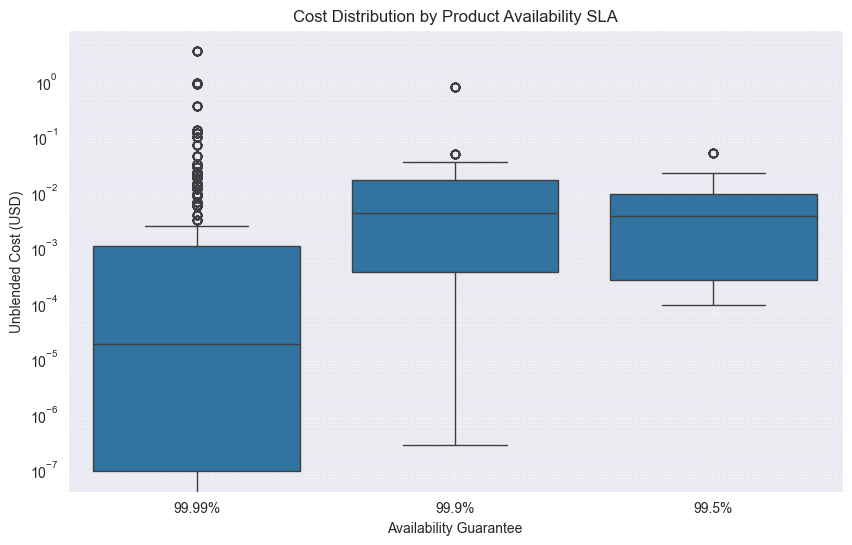

In [12]:
df_analysis = data2[['product_availability', 'line_item_unblended_cost']].copy()

# Remove rows where availability is missing (NaN)
df_analysis = df_analysis.dropna(subset=['product_availability'])

# Convert '99.99%' string to float 99.99
# We strip the '%' sign and convert to a number
df_analysis['availability_numeric'] = df_analysis['product_availability'].astype(str).str.rstrip('%').astype(float)

# Ensure cost is numeric (just in case)
df_analysis['line_item_unblended_cost'] = pd.to_numeric(df_analysis['line_item_unblended_cost'], errors='coerce')


# 2. CHECKING CORRELATION
# A score close to 1.0 means strong positive relationship (Higher SLA = Higher Cost)
correlation = df_analysis['availability_numeric'].corr(df_analysis['line_item_unblended_cost'])

print(f"Correlation between Availability and Cost: {correlation:.4f}")


# 3. VISUALIZATION (Boxplot)
# This shows the range of prices for each availability tier
plt.figure(figsize=(10, 6))
sns.boxplot(x='product_availability', y='line_item_unblended_cost', data=df_analysis)

plt.title('Cost Distribution by Product Availability SLA')
plt.xlabel('Availability Guarantee')
plt.ylabel('Unblended Cost (USD)')
plt.yscale('log') # Log scale helps because cloud costs vary wildly (cents vs thousands)
plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()

In [13]:
data2.isna().sum()

identity_line_item_id                                  0
identity_time_interval                                 0
bill_invoicing_entity                                  0
bill_billing_entity                                    0
bill_bill_type                                         0
                                                  ...   
resource_tags_user_dlm_managed                   1338789
resource_tags_user_sagemaker_domain_arn          1342972
resource_tags_user_sagemaker_user_profile_arn    1342972
year                                                   0
month                                                  0
Length: 177, dtype: int64

Setelah melakukan pemahaman data dan data cleaning untuk menggunakan kolom-kolom yang mana saja. Berikut adalah list-list fitur yang akan dipakai.

**DEPENDENT VARIABLE** : line_item_unblended_cost

**INDEPENDENT VARIABLE**:

**A. Usage and Specs**

1) line_item_usage_amount
2) line_item_normalization_factor
3) line_item_normalized_usage_amount
4) product_clock_speed
5) line_item_line_item_type
6) line_item_usage_type
7) line_item_operation

**B. Location and Network**

8) product_region
9) line_item_availability_zone
10) product_to_location
11) product_from_location
12) product_transfer_type

**C. Product Metadata**

13) line_item_product_code
14) product_product_family
15) pricing_term
16) pricing_unit

**D. Business Tags**

17) resource_tags_user_customer
18) resource_tags_user_project
19) resource_tags_user_project_owner
20) resource_tags_user_tech_owner

**E. Time**

21) line_item_usage_start_date
22) line_item_usage_end_date

--> menghasilkan kolom duration hours (dr 2 kolom atas), day_of_week (dari start_date), hour_of_day (dari start_date)

semua log catatan cleaning bagian ini terdapat pada file `cleaning-log-phase1.txt`

In [14]:
df_cleaned1 = data2[["line_item_usage_start_date", "line_item_usage_end_date", "line_item_usage_amount", 
                     "line_item_normalization_factor", "line_item_normalized_usage_amount", "product_clock_speed", 
                     "line_item_line_item_type", "line_item_usage_type", "line_item_operation", 
                     "product_region", "line_item_availability_zone", "product_to_location", "product_from_location", 
                     "product_transfer_type", "line_item_product_code", "product_product_family", "pricing_term", 
                     "pricing_unit", "resource_tags_user_customer", "resource_tags_user_project", 
                     "resource_tags_user_project_owner", "resource_tags_user_tech_owner", "line_item_unblended_cost"]].copy()
df_cleaned1

,line_item_usage_start_date,line_item_usage_end_date,line_item_usage_amount,line_item_normalization_factor,line_item_normalized_usage_amount,product_clock_speed,line_item_line_item_type,line_item_usage_type,line_item_operation,product_region,...,product_transfer_type,line_item_product_code,product_product_family,pricing_term,pricing_unit,resource_tags_user_customer,resource_tags_user_project,resource_tags_user_project_owner,resource_tags_user_tech_owner,line_item_unblended_cost
0,2025-02-13 08:00:00.000,2025-02-13 09:00:00.000,1.115000e+03,0.0,0.0,NaN,Usage,APS1-EBS:VolumeIOUsage,EBS:IO-Write,ap-southeast-1,...,NaN,AmazonEC2,System Operation,OnDemand,IOs,Kemdikbud,GBGTKPAUD,Minova,INFRA,0.000089
1,2025-02-01 12:00:00.000,2025-02-01 13:00:00.000,1.000000e+00,1.0,1.0,3.1 GHz,Usage,APS1-EBSOptimized:t3.small,Hourly,ap-southeast-1,...,NaN,AmazonEC2,Compute Instance,OnDemand,Hrs,NaN,infra,NaN,INFRA,0.000000
2,2025-02-05 10:00:00.000,2025-02-05 11:00:00.000,2.976190e-03,0.0,0.0,NaN,Usage,APS1-EBS:VolumeUsage.gp3,CreateVolume-Gp3,ap-southeast-1,...,NaN,AmazonEC2,Storage,OnDemand,GB-Mo,Kemdikbud,SIMPKB,Minova,INFRA,0.000286
3,2025-02-15 08:00:00.000,2025-02-15 09:00:00.000,3.720238e-02,0.0,0.0,NaN,Usage,APS1-EBS:VolumeUsage,CreateVolume,ap-southeast-1,...,NaN,AmazonEC2,Storage,OnDemand,GB-Mo,NaN,PPG,NaN,NaN,0.002976
4,2025-02-01 15:00:00.000,2025-02-01 16:00:00.000,3.730000e-08,0.0,0.0,NaN,Usage,APS4-USE1-AWS-In-Bytes,PublicIP-In,ap-southeast-3,...,InterRegion Inbound,AmazonEC2,Data Transfer,OnDemand,GB,NaN,infra,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343342,2025-02-02 10:00:00.000,2025-02-02 11:00:00.000,1.995000e+03,0.0,0.0,NaN,Usage,APS1-EBS:VolumeIOUsage,EBS:IO-Write,ap-southeast-1,...,NaN,AmazonEC2,System Operation,OnDemand,IOs,Kemdikbud,GuruPenggerak,Minova,INFRA,0.000160
1343343,2025-02-03 20:00:00.000,2025-02-03 21:00:00.000,1.000000e+00,8.0,8.0,3.4 GHz,Usage,APS4-EBSOptimized:c5.xlarge,Hourly,ap-southeast-3,...,NaN,AmazonEC2,Compute Instance,OnDemand,Hrs,NaN,infra,NaN,INFRA,0.000000
1343344,2025-02-09 07:00:00.000,2025-02-09 08:00:00.000,0.000000e+00,0.0,0.0,NaN,Usage,APS1-EBS:VolumeP-IOPS.gp3,CreateVolume-Gp3,ap-southeast-1,...,NaN,AmazonEC2,System Operation,OnDemand,IOPS-Mo,Kemdikbud,SIMPKB,Minova,NaN,0.000000
1343345,2025-02-08 09:00:00.000,2025-02-08 10:00:00.000,1.000000e+00,1.0,1.0,2.5 GHz,SavingsPlanCoveredUsage,APS1-BoxUsage:t3a.small,RunInstances,ap-southeast-1,...,NaN,AmazonEC2,Compute Instance,OnDemand,Hrs,NaN,SIMPKB,NaN,NaN,0.023600


In [15]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343347 entries, 0 to 1343346
Data columns (total 23 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   line_item_usage_start_date         1343347 non-null  object 
 1   line_item_usage_end_date           1343347 non-null  object 
 2   line_item_usage_amount             1343347 non-null  float64
 3   line_item_normalization_factor     1343347 non-null  float64
 4   line_item_normalized_usage_amount  1343347 non-null  float64
 5   product_clock_speed                141294 non-null   object 
 6   line_item_line_item_type           1343347 non-null  object 
 7   line_item_usage_type               1343347 non-null  object 
 8   line_item_operation                1328966 non-null  object 
 9   product_region                     1342980 non-null  object 
 10  line_item_availability_zone        154346 non-null   object 
 11  product_to_location     

Namun, setelah di pilih-pilih fitur yang penting ada beberapa fitur yang memiliki missing values yang sangat besar bahkan melebihi 1 juta rows, yaitu `product_clock_speed` dan `line_item_availability_zone`. Sehingga harus di drop kolomnya untuk menghindari model ML tidak bisa belajar karena model seperti Random Forest tidak bisa belajar dari `null` values dan kurangnya informasi aktual

In [16]:
df_cleaned1.isna().sum()

line_item_usage_start_date                 0
line_item_usage_end_date                   0
line_item_usage_amount                     0
line_item_normalization_factor             0
line_item_normalized_usage_amount          0
product_clock_speed                  1202053
line_item_line_item_type                   0
line_item_usage_type                       0
line_item_operation                    14381
product_region                           367
line_item_availability_zone          1189001
product_to_location                   724129
product_from_location                 724129
product_transfer_type                 724129
line_item_product_code                     0
product_product_family                 20462
pricing_term                           52208
pricing_unit                             367
resource_tags_user_customer           497061
resource_tags_user_project            101327
resource_tags_user_project_owner      495464
resource_tags_user_tech_owner         507067
line_item_

In [17]:
df_cleaned1.drop(columns=["line_item_availability_zone", "product_clock_speed"], inplace=True)
df_cleaned1.isna().sum()

line_item_usage_start_date                0
line_item_usage_end_date                  0
line_item_usage_amount                    0
line_item_normalization_factor            0
line_item_normalized_usage_amount         0
line_item_line_item_type                  0
line_item_usage_type                      0
line_item_operation                   14381
product_region                          367
product_to_location                  724129
product_from_location                724129
product_transfer_type                724129
line_item_product_code                    0
product_product_family                20462
pricing_term                          52208
pricing_unit                            367
resource_tags_user_customer          497061
resource_tags_user_project           101327
resource_tags_user_project_owner     495464
resource_tags_user_tech_owner        507067
line_item_unblended_cost                  0
dtype: int64

In [18]:
df_cleaned1.head(20)

,line_item_usage_start_date,line_item_usage_end_date,line_item_usage_amount,line_item_normalization_factor,line_item_normalized_usage_amount,line_item_line_item_type,line_item_usage_type,line_item_operation,product_region,product_to_location,...,product_transfer_type,line_item_product_code,product_product_family,pricing_term,pricing_unit,resource_tags_user_customer,resource_tags_user_project,resource_tags_user_project_owner,resource_tags_user_tech_owner,line_item_unblended_cost
0,2025-02-13 08:00:00.000,2025-02-13 09:00:00.000,1.115000e+03,0.0,0.0,Usage,APS1-EBS:VolumeIOUsage,EBS:IO-Write,ap-southeast-1,NaN,...,NaN,AmazonEC2,System Operation,OnDemand,IOs,Kemdikbud,GBGTKPAUD,Minova,INFRA,8.920000e-05
1,2025-02-01 12:00:00.000,2025-02-01 13:00:00.000,1.000000e+00,1.0,1.0,Usage,APS1-EBSOptimized:t3.small,Hourly,ap-southeast-1,NaN,...,NaN,AmazonEC2,Compute Instance,OnDemand,Hrs,NaN,infra,NaN,INFRA,0.000000e+00
2,2025-02-05 10:00:00.000,2025-02-05 11:00:00.000,2.976190e-03,0.0,0.0,Usage,APS1-EBS:VolumeUsage.gp3,CreateVolume-Gp3,ap-southeast-1,NaN,...,NaN,AmazonEC2,Storage,OnDemand,GB-Mo,Kemdikbud,SIMPKB,Minova,INFRA,2.857143e-04
3,2025-02-15 08:00:00.000,2025-02-15 09:00:00.000,3.720238e-02,0.0,0.0,Usage,APS1-EBS:VolumeUsage,CreateVolume,ap-southeast-1,NaN,...,NaN,AmazonEC2,Storage,OnDemand,GB-Mo,NaN,PPG,NaN,NaN,2.976190e-03
4,2025-02-01 15:00:00.000,2025-02-01 16:00:00.000,3.730000e-08,0.0,0.0,Usage,APS4-USE1-AWS-In-Bytes,PublicIP-In,ap-southeast-3,US East (N. Virginia),...,InterRegion Inbound,AmazonEC2,Data Transfer,OnDemand,GB,NaN,infra,NaN,NaN,0.000000e+00
5,2025-02-13 20:00:00.000,2025-02-13 21:00:00.000,1.000000e+00,0.0,0.0,Usage,APS1-Requests-Tier2,ReadBucketPolicy,ap-southeast-1,NaN,...,NaN,AmazonS3,API Request,OnDemand,Requests,Kemdikbud,P2GTKMP,Minova,INFRA,4.000000e-07
6,2025-02-08 18:00:00.000,2025-02-08 19:00:00.000,1.488095e-02,0.0,0.0,Usage,APS1-EBS:VolumeUsage.gp3,CreateVolume-Gp3,ap-southeast-1,NaN,...,NaN,AmazonEC2,Storage,OnDemand,GB-Mo,NaN,Infra,NaN,NaN,1.428571e-03
7,2025-02-05 23:00:00.000,2025-02-06 00:00:00.000,4.871109e-02,0.0,0.0,Usage,APS1-DataTransfer-Regional-Bytes,InterZone-In,ap-southeast-1,Asia Pacific (Singapore),...,IntraRegion,AmazonEC2,Data Transfer,OnDemand,GB,NaN,infra,NaN,INFRA,4.871109e-04
8,2025-02-07 02:00:00.000,2025-02-07 03:00:00.000,1.000000e+00,8.0,8.0,Usage,APS1-BoxUsage:t3.xlarge,RunInstances,ap-southeast-1,NaN,...,NaN,AmazonEC2,Compute Instance,OnDemand,Hrs,Kemdikbud,SIMPKB,Minova,DIP,2.112000e-01
9,2025-02-04 09:00:00.000,2025-02-04 10:00:00.000,7.450000e-08,0.0,0.0,Usage,APS1-DataTransfer-Out-Bytes,RunInstances,ap-southeast-1,External,...,AWS Outbound,AmazonEC2,Data Transfer,OnDemand,GB,NaN,infra,NaN,NaN,8.900000e-09


In [19]:
df_cleaned1.shape

(1343347, 21)

In [20]:
df_cleaned1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343347 entries, 0 to 1343346
Data columns (total 21 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   line_item_usage_start_date         1343347 non-null  object 
 1   line_item_usage_end_date           1343347 non-null  object 
 2   line_item_usage_amount             1343347 non-null  float64
 3   line_item_normalization_factor     1343347 non-null  float64
 4   line_item_normalized_usage_amount  1343347 non-null  float64
 5   line_item_line_item_type           1343347 non-null  object 
 6   line_item_usage_type               1343347 non-null  object 
 7   line_item_operation                1328966 non-null  object 
 8   product_region                     1342980 non-null  object 
 9   product_to_location                619218 non-null   object 
 10  product_from_location              619218 non-null   object 
 11  product_transfer_type   

## Fase cleaning 2
mengisi value yang null dari fitur-fitur yang akan dipakai dan konversi tipe data menjadi yang semestinya

### 1. Mengisi nilai-nilai yang hilang secara "struktural" 

Grup A : kolom-kolom transfer data (724k missing values)
- `product_to_location`
- `product_from_location`
- `product_transfer_type`

Aksi eksekusi : mengisi dengan value "No Transfer" karena kolom-kolom ini hanya terisi ketika data secara fisik berpindah melalui jaringan.

In [21]:
# Fill Transfer info
cols_transfer = ['product_to_location', 'product_from_location', 'product_transfer_type']
df_cleaned1[cols_transfer] = df_cleaned1[cols_transfer].fillna('No Transfer')

Grup B : kolom-kolom resource tags (100k-500k misssing)
- resource_tags_user_customer
- resource_tags_user_project
- resource_tags_user_project_owner
- resource_tags_user_tech_owner

Aksi eksekusi : mengisi dengan value "Untagged" karena resource-resource pada kolom tersebut sumber data yang tidak dilabeli

In [22]:
cols_tags = [
    'resource_tags_user_customer',
    'resource_tags_user_project',
    'resource_tags_user_project_owner',
    'resource_tags_user_tech_owner'
]
df_cleaned1[cols_tags] = df_cleaned1[cols_tags].fillna('Untagged')

Grup C: kolom `pricing_term`

Aksi eksekusi : mengisi dengan value "OnDemand" karena dalam banyak laporan AWS, label "On-Demand" diperlakukan sebagai status null default. Jika sebuah baris tidak Reserved dan tidak Spot, maka secara definisi, baris tersebut adalah On-Demand.

In [23]:
df_cleaned1['pricing_term'] = df_cleaned1['pricing_term'].fillna('OnDemand')

### 2. Drop baris-baris yang random missing values

Grup D : kolom-kolom yang missing valuesnya sedikit
- `line_item_operation` (14k missing)
- `product_product_family` (20k missing)
- `product_region` (367 missing)
- `pricing_unit` (367 missing)

Aksi eksekusi : drop null values, tidak masalah kalau drop hanya 20k+- baris

In [24]:
# DROP Rows with Random Missing Values
# Identify columns where can't afford to guess
cols_drop_rows = [
    'line_item_operation',
    'product_product_family',
    'product_region',
    'pricing_unit'
]

df_cleaned1.dropna(subset=cols_drop_rows, inplace=True)

In [25]:
df_cleaned1.isna().sum()

line_item_usage_start_date           0
line_item_usage_end_date             0
line_item_usage_amount               0
line_item_normalization_factor       0
line_item_normalized_usage_amount    0
line_item_line_item_type             0
line_item_usage_type                 0
line_item_operation                  0
product_region                       0
product_to_location                  0
product_from_location                0
product_transfer_type                0
line_item_product_code               0
product_product_family               0
pricing_term                         0
pricing_unit                         0
resource_tags_user_customer          0
resource_tags_user_project           0
resource_tags_user_project_owner     0
resource_tags_user_tech_owner        0
line_item_unblended_cost             0
dtype: int64

### 3. Menormalisasikan value yang sama namun beda penulisan

terdeteksi terhadap divisi DPP proyek yang dipegang memiliki value yang sama namun beda penulisan sehingga harus dinormalisasikan, yaitu

MASOOK dan Masook

In [26]:
df_cleaned1[["resource_tags_user_tech_owner", "resource_tags_user_project"]].value_counts()

resource_tags_user_tech_owner  resource_tags_user_project
Untagged                       infra                         152627
INFRA                          SIMPKB                        124312
Untagged                       SIMPKB                         90472
INFRA                          PPG                            89756
Untagged                       Untagged                       78545
                                                              ...  
Minova                         UKKJ                              15
Untagged                       DiklatDIKMENDIKSUS                15
Minova                         P2GTMP                            15
Untagged                       praktik-baik                      15
                               PPGMUTU                            7
Name: count, Length: 115, dtype: int64

# 4. Feature Engineering

konversi kolom `line_item_usage_start_date` dan `line_item_usage_end_date` menjadi tipe data datetime, ekstraksi fitur Duration, Day of month, and Day/Hour, dan drop kolom `line_item_usage_start_date` dan `line_item_usage_end_date`

In [26]:
# 1. Convert to datetime objects first
df_cleaned1['line_item_usage_start_date'] = pd.to_datetime(df_cleaned1['line_item_usage_start_date'])
df_cleaned1['line_item_usage_end_date'] = pd.to_datetime(df_cleaned1['line_item_usage_end_date'])

# 2. Extract The "Who, When, How Long"

# A. The Specific Date (1, 2, ... 28) -> "Each single day"
df_cleaned1['day_of_month'] = df_cleaned1['line_item_usage_start_date'].dt.day

# B. The Day Name (0=Monday, 6=Sunday) -> "What day it is"
df_cleaned1['day_of_week'] = df_cleaned1['line_item_usage_start_date'].dt.dayofweek

# C. The Time of Day (0-23)
df_cleaned1['hour_of_day'] = df_cleaned1['line_item_usage_start_date'].dt.hour

# D. The Duration (How long did it run?)
# We convert the timedelta to hours (float)
df_cleaned1['duration_hours'] = (df_cleaned1['line_item_usage_end_date'] - df_cleaned1['line_item_usage_start_date']).dt.total_seconds() / 3600

# 3. NOW drop the original date columns safely
df_cleaned1.drop(['line_item_usage_start_date', 'line_item_usage_end_date'], axis=1, inplace=True)

# ---------------------------------------------------------
# Verification
# This will show you the new columns with values like 1, 15, 28 for days
print(df_cleaned1[['day_of_month', 'day_of_week', 'hour_of_day']].head())
print("-" * 30)
print(df_cleaned1.info())

   day_of_month  day_of_week  hour_of_day
0            13            3            8
1             1            5           12
2             5            2           10
3            15            5            8
4             1            5           15
------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 1308761 entries, 0 to 1343345
Data columns (total 23 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   line_item_usage_amount             1308761 non-null  float64
 1   line_item_normalization_factor     1308761 non-null  float64
 2   line_item_normalized_usage_amount  1308761 non-null  float64
 3   line_item_line_item_type           1308761 non-null  object 
 4   line_item_usage_type               1308761 non-null  object 
 5   line_item_operation                1308761 non-null  object 
 6   product_region                     1308761 non-null  object 
 7   product_to

In [27]:
df_cleaned1.drop(["duration_hours"], axis=1, inplace=True)
df_cleaned1

,line_item_usage_amount,line_item_normalization_factor,line_item_normalized_usage_amount,line_item_line_item_type,line_item_usage_type,line_item_operation,product_region,product_to_location,product_from_location,product_transfer_type,...,pricing_term,pricing_unit,resource_tags_user_customer,resource_tags_user_project,resource_tags_user_project_owner,resource_tags_user_tech_owner,line_item_unblended_cost,day_of_month,day_of_week,hour_of_day
0,1.115000e+03,0.0,0.0,Usage,APS1-EBS:VolumeIOUsage,EBS:IO-Write,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,IOs,Kemdikbud,GBGTKPAUD,Minova,INFRA,0.000089,13,3,8
1,1.000000e+00,1.0,1.0,Usage,APS1-EBSOptimized:t3.small,Hourly,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,Hrs,Untagged,infra,Untagged,INFRA,0.000000,1,5,12
2,2.976190e-03,0.0,0.0,Usage,APS1-EBS:VolumeUsage.gp3,CreateVolume-Gp3,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,GB-Mo,Kemdikbud,SIMPKB,Minova,INFRA,0.000286,5,2,10
3,3.720238e-02,0.0,0.0,Usage,APS1-EBS:VolumeUsage,CreateVolume,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,GB-Mo,Untagged,PPG,Untagged,Untagged,0.002976,15,5,8
4,3.730000e-08,0.0,0.0,Usage,APS4-USE1-AWS-In-Bytes,PublicIP-In,ap-southeast-3,US East (N. Virginia),Asia Pacific (Jakarta),InterRegion Inbound,...,OnDemand,GB,Untagged,infra,Untagged,Untagged,0.000000,1,5,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343341,1.000000e+00,2.0,2.0,Usage,APS1-BoxUsage:t3a.medium,RunInstances,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,Hrs,Kemendikbudristek,PerlindunganPTK,Minova,INFRA,0.047200,1,5,14
1343342,1.995000e+03,0.0,0.0,Usage,APS1-EBS:VolumeIOUsage,EBS:IO-Write,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,IOs,Kemdikbud,GuruPenggerak,Minova,INFRA,0.000160,2,6,10
1343343,1.000000e+00,8.0,8.0,Usage,APS4-EBSOptimized:c5.xlarge,Hourly,ap-southeast-3,No Transfer,No Transfer,No Transfer,...,OnDemand,Hrs,Untagged,infra,Untagged,INFRA,0.000000,3,0,20
1343344,0.000000e+00,0.0,0.0,Usage,APS1-EBS:VolumeP-IOPS.gp3,CreateVolume-Gp3,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,IOPS-Mo,Kemdikbud,SIMPKB,Minova,Untagged,0.000000,9,6,7


# 5. Data preprocessing and Modelling
Melakukan sortir dataset berdasarkan waktu terlebih dahulu

detail kolom `day_of_week` :
1. Senin = 0
2. Selasa = 1
3. Rabu = 2
4. Kamis = 3
5. Jumat = 4
6. Sabtu = 5
7. Minggu = 6

detail kolom `day_of_months` : tanggal

detail kolom `hour_of_day` : jam


In [28]:
df_cleaned1.sort_values(by=['day_of_month', 'hour_of_day'], inplace=True)

# Reset index after sorting so it's clean 0 to 1,343,346
df_cleaned1.reset_index(drop=True, inplace=True)
df_cleaned1

,line_item_usage_amount,line_item_normalization_factor,line_item_normalized_usage_amount,line_item_line_item_type,line_item_usage_type,line_item_operation,product_region,product_to_location,product_from_location,product_transfer_type,...,pricing_term,pricing_unit,resource_tags_user_customer,resource_tags_user_project,resource_tags_user_project_owner,resource_tags_user_tech_owner,line_item_unblended_cost,day_of_month,day_of_week,hour_of_day
0,1.257487e-03,0.0,0.0,Usage,APS1-DataTransfer-Regional-Bytes,InterZone-Out,ap-southeast-1,Asia Pacific (Singapore),Asia Pacific (Singapore),IntraRegion,...,OnDemand,GB,Kemendikbudristek,PerlindunganPTK,Minova,DIP,1.257490e-05,1,5,0
1,2.232143e-01,0.0,0.0,Usage,APS1-EBS:VolumeUsage.gp3,CreateVolume-Gp3,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,GB-Mo,Kemdikbud,SIMPKB,Minova,INFRA,2.142857e-02,1,5,0
2,5.442370e-05,0.0,0.0,Usage,APS1-DataTransfer-Regional-Bytes,InterZone-In,ap-southeast-1,Asia Pacific (Singapore),Asia Pacific (Singapore),IntraRegion,...,OnDemand,GB,Untagged,SIMPKB,Untagged,Untagged,5.442000e-07,1,5,0
3,5.593500e-06,0.0,0.0,Usage,APS4-USW1-AWS-Out-Bytes,PublicIP-Out,ap-southeast-3,US West (N. California),Asia Pacific (Jakarta),InterRegion Outbound,...,OnDemand,GB,Untagged,infra,Untagged,Untagged,5.594000e-07,1,5,0
4,1.488095e-01,0.0,0.0,Usage,APS1-EBS:VolumeUsage,CreateVolume,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,GB-Mo,Kemenag,SIMPATIKA,Jayantara,INFRA,1.190476e-02,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308756,1.000000e+00,0.0,0.0,Usage,APS1-Requests-Tier2,HeadBucket,ap-southeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,Requests,Untagged,Untagged,Untagged,Untagged,4.000000e-07,16,6,14
1308757,3.730000e-08,0.0,0.0,Usage,APS1-USE1-AWS-In-Bytes,PublicIP-In,ap-southeast-1,US East (N. Virginia),Asia Pacific (Singapore),InterRegion Inbound,...,OnDemand,GB,Kemdikbud,PPGMUTU,Minova,INFRA,0.000000e+00,16,6,14
1308758,1.758300e-06,0.0,0.0,Usage,APS1-DataTransfer-In-Bytes,RunInstances,ap-southeast-1,Asia Pacific (Singapore),External,AWS Inbound,...,OnDemand,GB,Kemdikbudristek,PERSONALPTK,Minova,INFRA,0.000000e+00,16,6,14
1308759,2.000000e+00,0.0,0.0,Usage,JP-Requests-HTTPS-Proxy,OPTIONS,ap-northeast-1,No Transfer,No Transfer,No Transfer,...,OnDemand,Requests,Kemdikbud,PPG,Minova,INFRA,2.400000e-06,16,6,14


Menstandarisasi kolom `resource_tags_user_customer` terlebih dahulu yang kemendikbud-nya memiliki beberapa jenis

In [29]:
df_cleaned1['resource_tags_user_customer'] = df_cleaned1['resource_tags_user_customer'].str.strip()

replace_dict = {
    'Kemdikbud': 'Kemendikbud',
    'Kemendikbudristek': 'Kemendikbud',
    'Kemdikbudristek': 'Kemendikbud',
    'Kemdukbud': 'Kemendikbud'
}

df_cleaned1['resource_tags_user_customer'] = df_cleaned1['resource_tags_user_customer'].replace(replace_dict)

print("Variasi nama customer setelah distandarisasi:")
df_cleaned1['resource_tags_user_customer'].value_counts()

Variasi nama customer setelah distandarisasi:


resource_tags_user_customer
Kemendikbud    760916
Untagged       467873
Telkom          37587
Kemenag         30257
Retail           4059
Kemensos         2573
BSKAP            2408
Internal         1216
Pemda            1113
Disdik            744
Minova             15
Name: count, dtype: int64

Sebelum beralih ke data preprocessing, berikut adalah fitur-fitur yang akan dipakai untuk pengembangan machine learning. 

Variabel independen adalah `line_item_unblended_cost`.

Variabel dependen terdapat 21 variabel

In [48]:
df_cleaned1.head(15)

(1308761, 22)

#### Menyimpan data yang sudah dibersihkan untuk dikelola dan analisis     

In [47]:
store_data = df_cleaned1.to_csv("../cleaned-datasets/data-cleaned-final.csv", index=False)
print(f"Cleaned dataset is stored")

Cleaned dataset is stored: None


Test import

In [51]:
test_impor = pd.read_csv("../cleaned-datasets/data-cleaned-final.csv")
test_impor.shape

(1308761, 22)

In [31]:
df_cleaned1["resource_tags_user_tech_owner"].value_counts()

resource_tags_user_tech_owner
INFRA       598359
Untagged    477149
DIP         142629
DLA          69188
DPP          19533
Minova        1153
DAK            750
Name: count, dtype: int64

In [32]:
print(f"Jumlah kolom yang digunakan (setelah cleaned) = {df_cleaned1.shape[1]}")
print("List kolom-kolom yang dipakai di bawah berikut : ")
print(*df_cleaned1, sep=", ")

Jumlah kolom yang digunakan (setelah cleaned) = 22
List kolom-kolom yang dipakai di bawah berikut : 
line_item_usage_amount, line_item_normalization_factor, line_item_normalized_usage_amount, line_item_line_item_type, line_item_usage_type, line_item_operation, product_region, product_to_location, product_from_location, product_transfer_type, line_item_product_code, product_product_family, pricing_term, pricing_unit, resource_tags_user_customer, resource_tags_user_project, resource_tags_user_project_owner, resource_tags_user_tech_owner, line_item_unblended_cost, day_of_month, day_of_week, hour_of_day


List jumlah types of values per categorical column sebelum encoding
- line_item_line_item_type -> 3 tipe
- line_item_usage_type -> 554 tipe
- line_item_operation -> 136 tipe
- product_region -> 21 tipe
- product_to_location -> 52 tipe
- product_from_location -> 27 tipe
- product_transfer_type -> 8 tipe
- line_item_product_code -> 23 tipe
- product_product_family -> 28 tipe
- pricing_term -> 2 tipe
- pricing_unit -> 26 tipe
- resource_tags_user_customer -> 11 tipe
- resource_tags_user_project -> 56 tipe 
- resource_tags_user_project_owner -> 6 tipe
- resource_tags_user_tech_owner -> 7 tipe

Untuk encoding kolom-kolom kategorikal di atas beserta jumlah tipe datanya, menggunakan frequency encoding untuk kolom yang high cardinality (>= 10 tipe):
- `line_item_usage_type` 
- `line_item_operation` 
- `resource_tags_user_project` 
- `product_to_location` 
- `product_product_family` 
- `product_from_location` 
- `pricing_unit`
- `line_item_product_code` 
- `product_region` 
- `resource_tags_user_customer`

dan menggunakan OHE untuk yang low cardinality (<10 tipe)
- `pricing_term`
- `line_item_line_item_type`
- `project_owner`
- `tech_owner`
- `transfer_type`

In [33]:
cols_ohe = [
    'pricing_term',
    'line_item_line_item_type',
    'resource_tags_user_project_owner',
    'resource_tags_user_tech_owner',
    'product_transfer_type'
]

cols_freq = [
    'line_item_usage_type', 'line_item_operation', 'resource_tags_user_project',
    'product_to_location', 'product_product_family', 'product_from_location',
    'pricing_unit', 'line_item_product_code', 'product_region',
    'resource_tags_user_customer'
]

# Dictionary untuk menyimpan peta Frequency Encoding (penting buat streamlit)
freq_maps = {}

In [34]:
for col in cols_freq:
    df_cleaned1[col] = df_cleaned1[col].astype(str) # Pastikan string
    freq_encoding = df_cleaned1[col].value_counts(normalize=True).to_dict() # Hitung %
    df_cleaned1[col] = df_cleaned1[col].map(freq_encoding) # Replace teks dengan angka %
    freq_maps[col] = freq_encoding # Simpan kamusnya

# C. Eksekusi One-Hot Encoding
df_ohe = pd.get_dummies(df_cleaned1, columns=cols_ohe, dtype=float)

# Simpan nama kolom final agar urutan di Streamlit sama persis
feature_names = df_ohe.drop(columns=['line_item_unblended_cost']).columns.tolist()

print(f"Encoding Selesai. Total Fitur: {len(feature_names)}")# atas dh oke, lanjut sesuai arahan pak nanang

Encoding Selesai. Total Fitur: 42


### Data Splitting based on time (1-16 February 2025)

In [35]:
cutoff_date = 14

# Filter data dari df_ohe
train_data = df_ohe[df_ohe['day_of_month'] < cutoff_date]
test_data = df_ohe[df_ohe['day_of_month'] >= cutoff_date]

target = 'line_item_unblended_cost'

# Drop target dari df_ohe untuk jadi X
X_train = train_data.drop(columns=[target])
y_train = train_data[target]

X_test = test_data.drop(columns=[target])
y_test = test_data[target]

print(f"Siap Training! Fitur yang masuk: {X_train.shape[1]} kolom")

Siap Training! Fitur yang masuk: 42 kolom


In [36]:
print("-" * 30)
print(f"SPLIT DATA (Total 16 Hari)")
print(f"Data Training (Tgl 1-13): {X_train.shape[0]} baris")
print(f"Data Testing  (Tgl 14-16): {X_test.shape[0]} baris")
print("-" * 30)

------------------------------
SPLIT DATA (Total 16 Hari)
Data Training (Tgl 1-13): 1091109 baris
Data Testing  (Tgl 14-16): 217652 baris
------------------------------


### Training and Evaluation

In [37]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-" * 30)
print(f"📊 HASIL EVALUASI:")
print(f"MSE: {mse:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R2 Score: {r2:.4f}")
print("-" * 30)

------------------------------
📊 HASIL EVALUASI:
MSE: 0.000001
RMSE: 0.001074
R2 Score: 0.9999
------------------------------


Untuk membuktikan hasil model prediksi tersebut adalah valid, coba memeriksa feature importance dan Scatter Plot

C:\Users\diyan\AppData\Local\Temp\ipykernel_3220\3981120003.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


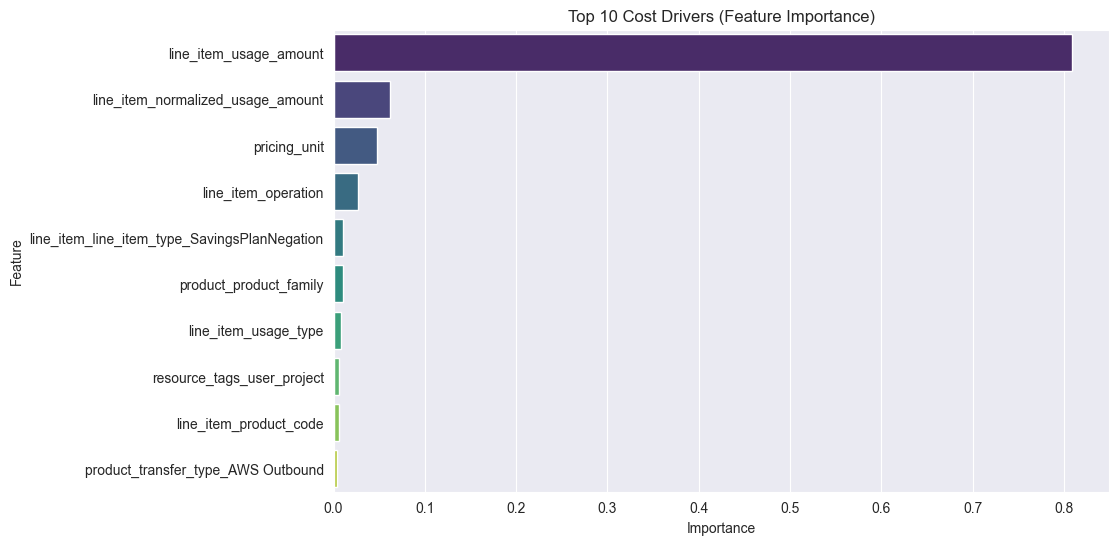

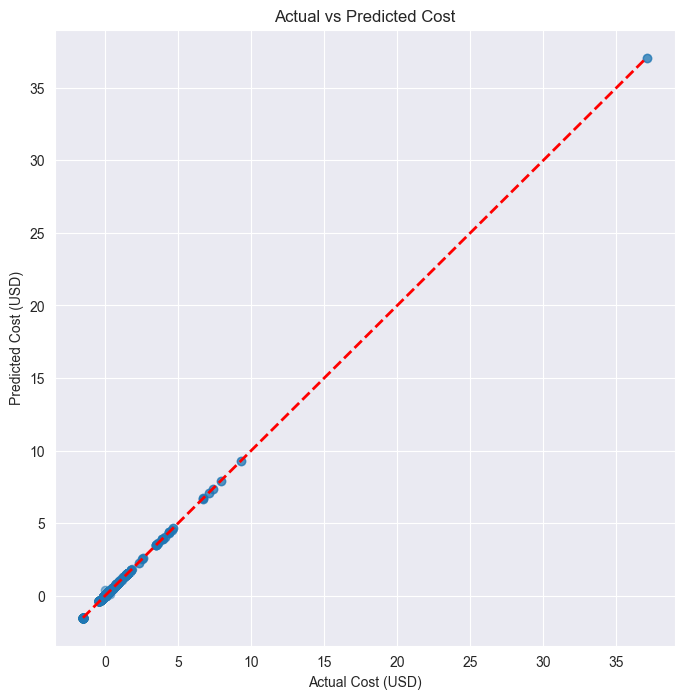

In [38]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Top 10 Cost Drivers (Feature Importance)')
plt.show()

# 2. Cek Sebaran Error (Residuals)
# Kita lihat apakah model cuma jago di angka 0 tapi hancur di angka besar.

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Garis diagonal sempurna
plt.xlabel('Actual Cost (USD)')
plt.ylabel('Predicted Cost (USD)')
plt.title('Actual vs Predicted Cost')
plt.show()

### Validasi Model: Feature Importance Analysis

Mengingat nilai akurasi ($R^2$) yang sangat tinggi (0.9999), validasi logika diperlukan untuk memastikan tidak terjadi *Data Leakage* (kebocoran data).

Berdasarkan grafik **Feature Importance** di atas, fitur **`line_item_usage_amount`** teridentifikasi sebagai fitur paling dominan (skor > 0.8). Hal ini membuktikan bahwa model telah mempelajari kausalitas yang benar secara bisnis Cloud Billing, di mana:

$$\text{Cost} \approx \text{Usage Amount} \times \text{Rate}$$

Dominasi fitur penggunaan (`usage`) dibanding fitur identitas atau fitur administratif lainnya mengonfirmasi bahwa model memprediksi biaya berdasarkan **volume konsumsi sumber daya**, bukan menghafal pola data yang tidak relevan (kebetulan).

### Melihat pengeluaran biaya untuk server per hari setiap Tech Owner

In [39]:
df_cleaned1["resource_tags_user_tech_owner"].value_counts()

resource_tags_user_tech_owner
INFRA       598359
Untagged    477149
DIP         142629
DLA          69188
DPP          19533
Minova        1153
DAK            750
Name: count, dtype: int64

In [42]:
# --- 1. Persiapan Data
test_data_with_pred = df_cleaned1.loc[X_test.index].copy()
test_data_with_pred['predicted_cost'] = y_pred

# Fungsi Agregasi Data
def get_visualization_data(tech_owner_name):
    # Filter data hanya untuk Tech Owner tertentu
    subset = test_data_with_pred[test_data_with_pred['resource_tags_user_tech_owner'] == tech_owner_name]

    # Group by Hari dan Jam untuk mendapatkan total cost per jam
    # Jumlahkan cost aktual dan cost prediksi
    viz_df = subset.groupby(['day_of_month', 'hour_of_day'])[['line_item_unblended_cost', 'predicted_cost']].sum().reset_index()

    # Bikin kolom 'Timestamp' palsu biar grafik nyambung (Februari 2025)
    viz_df['timestamp'] = pd.to_datetime({
        'year': 2025,
        'month': 2,
        'day': viz_df['day_of_month'],
        'hour': viz_df['hour_of_day']
    })

    return viz_df

# --- 2. Kode Generating Visualisasi 

# Daftar Tech Owner
tech_owners = ['INFRA', 'DIP', 'DLA', 'DPP', 'Minova', 'DAK']

for owner in tech_owners:
    # 1. Ambil data agregasi untuk owner tersebut
    df_viz = get_visualization_data(owner)

    # Cek apakah ada datanya (karena bisa jadi testing set tidak punya data untuk owner tertentu)
    if df_viz.empty:
        print(f"Tidak ada data testing untuk Tech Owner: {owner}")
        continue

    # 2. Format data untuk Plotly (Melt/Unpivot) agar mudah di-plot dua garis
    df_melted = df_viz.melt(
        id_vars=['timestamp'],
        value_vars=['line_item_unblended_cost', 'predicted_cost'],
        var_name='Cost Type',
        value_name='Total Cost (USD)'
    )

    # Ganti nama label agar lebih cantik di legenda
    df_melted['Cost Type'] = df_melted['Cost Type'].replace({
        'line_item_unblended_cost': 'Actual Cost',
        'predicted_cost': 'Predicted Cost (AI)'
    })

    # 3. Buat Grafik Garis (Line Chart)
    fig = px.line(
        df_melted,
        x='timestamp',
        y='Total Cost (USD)',
        color='Cost Type',
        title=f"<b>{owner}</b>: Cloud Cost Performance (Actual vs Predicted)",
        color_discrete_map={"Actual Cost": "#1f77b4", "Predicted Cost (AI)": "#ff7f0e"}, # Biru & Oranye
        markers=True
    )

    # Kustomisasi Layout 
    fig.update_layout(
        xaxis_title="Waktu (Tanggal & Jam)",
        yaxis_title="Total Biaya ($)",
        hovermode="x unified", 
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # 4. Tampilkan Grafik
    print(f"Menampilkan grafik untuk: {owner}")
    fig.show()

Menampilkan grafik untuk: INFRA


Menampilkan grafik untuk: DIP


Menampilkan grafik untuk: DLA


Menampilkan grafik untuk: DPP


Menampilkan grafik untuk: Minova


Menampilkan grafik untuk: DAK
